# CS224 - Winter 2023 - PROGRAMMING ASSIGNMENT 2 - LINEAR AND LOGISTIC REGRESSION

**Due**: March 3, 2023 @ 11:59pm PDT

**Maximum points**: 20

<div style="margin-bottom: 15px; padding: 15px; color: #31708f; background-color: #d9edf7; border: 1px solid #bce8f1; border-radius: 5px;">
    
<b><font size=+2>Enter your information below:</font></b></br></br>

  <b>(full) Name</b>: Yash Aggarwal
  </br>
  <b>Student ID Number</b>:  862333037
  </br></br>
    
<b>By submitting this notebook, I assert that the work below is my own work, completed for this course.  Except where explicitly cited, none of the portions of this notebook are duplicated from anyone else's work or my own previous work.</b>
</div>

<div style="padding: 15px; color: #8a6d3b; background-color: #fcf8e3; border: 1px solid #faebcc; border-radius: 5px;">
<b><font size=+2>Academic Integrity</font></b></br> 
Each assignment should be done  individually. You may discuss general approaches with other students in the class, and ask questions to the TA, but  you must only submit work that is yours . If you receive help by any external sources (other than the TA and the instructor), you must properly credit those sources. The UCR Academic Integrity policies are available at <a href="http://conduct.ucr.edu/policies/academicintegrity.html" target="_blank">http://conduct.ucr.edu/policies/academicintegrity.html</a>.
</div>

# Overview 
In this assignment you will implement and test two supervised learning algorithms: linear regression (Question 1) and logistic regression (Question 2). 

For this assignment we will use the functionality of [Pandas](https://pandas.pydata.org/), [Matplotlib](https://matplotlib.org/), and [Numpy](http://www.numpy.org/).

If you are asked to **implement** a particular functionality, you should **not** use an existing implementation from the libraries above (or some other library that you may find). When in doubt, please ask. 

Before you start, make sure you have installed all those packages in your local Jupyter instance.


Read **all** cells carefully and answer **all** parts (both text and missing code). You will complete all the code marked `TODO` and answer descriptive/derivation questions.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import random as rand
from sklearn.model_selection import train_test_split 
from sklearn import linear_model

# **Question 1: Linear Regression [12 points]**
We will implement linear regression using direct solution and gradient descent. 

We will first attempt to predict output using a single attribute/feature. Then we will perform linear regression using multiple attributes/features. 

### **Getting data [1 point]**
In this assignment we will use the Boston housing dataset. 

The Boston housing data set was collected in the 1970s to study the relationship between house price and various factors such as the house size, crime rate, socio-economic status, etc.  Since the variables are easy to understand, the data set is ideal for learning basic concepts in machine learning.  The raw data and a complete description of the dataset can be found on the UCI website:
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names, 
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data

or 

http://www.ccs.neu.edu/home/vip/teach/MLcourse/data/housing_desc.txt

I have supplied a list `names` of the column headers.  You will have to set the options in the `read_csv` command to correctly delimit the data in the file and name the columns correctly.

In [ ]:
names =[
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
    'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'
]

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                 header=None,delim_whitespace=True,names=names,na_values='?')

Create a response vector `y` with the values in the column `PRICE`.  The vector `y` should be a 1D `numpy.array` structure.

In [ ]:
# TODO
y = np.array(df['PRICE'])
print (type(y), y.shape)
y

<class 'numpy.ndarray'> (506,)


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

Use the response vector `y` to find the mean house price in thousands and the fraction of homes that are above $40k. (You may realize this is very cheap.  Prices have gone up a lot since the 1970s!).   Create print statements of the form (replace `a`'s and `b`'s with the number you get):

    The mean house price is aa.bb thousands of dollars.
    Only a.b percent are above $40k.

In [ ]:
# TODO 
mean = np.sum(y)/len(y)
print ('The mean house price is {00:.2f} thousands of dollars.'.format(mean))

greater = [x for x in y if x > 40]
percent = len(greater)*100/len(y)
print ('Only {0:.1f} percent are above $40k.'.format(percent))

The mean house price is 22.53 thousands of dollars.
Only 6.1 percent are above $40k.


### **Visualizing the Data [1 point]**

Python's `matplotlib` has very good routines for plotting and visualizing data that closely follows the format of MATLAB programs.  You can load the `matplotlib` package with the following commands.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Similar to the `y` vector, create a predictor vector `x` containing the values in the `RM` column, which represents the average number of rooms in each region.

In [ ]:
# TODO
x = np.array(df['RM'])
print (type(x), x.shape)
x

<class 'numpy.ndarray'> (506,)


array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

Create a scatter plot of the `PRICE` vs. the `RM` attribute.  Make sure your plot has **grid lines** and label the axes with reasonable **labels** so that someone else can understand the plot.

[]

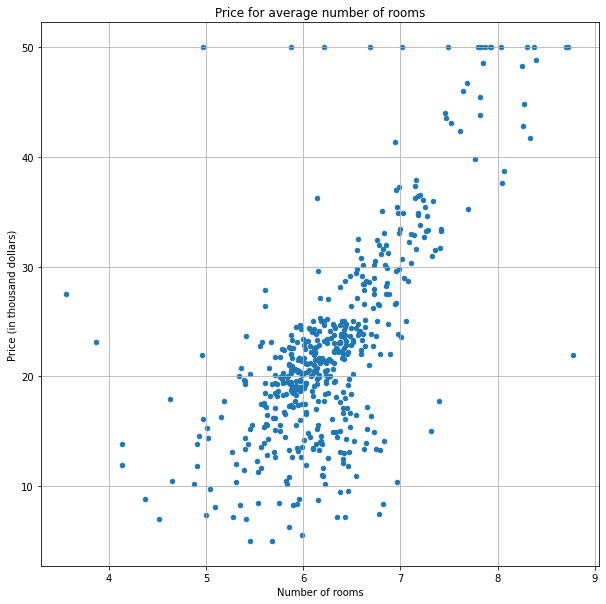

In [ ]:
# TODO
plt.figure(1,figsize=(10,10))
plt.ylabel('Price (in thousand dollars)')
plt.xlabel('Number of rooms')
plt.title('Price for average number of rooms')
plt.scatter(x,y,s=20)
plt.grid()
plt.plot()

The number of rooms and price seem to have a linear trend, so let us try to predict price using number of rooms first. 

### Derivation of a simple linear model for a single feature
Suppose we have $N$ pairs of training samples $(x_1,y_1),\ldots, (x_N,y_N)$, where $x_i \in \mathbb{R}$ and $y_i \in \mathbb{R}$. 

We want to perform a linear fit for this 1D data as 
$$y = wx+b,$$
where $w\in \mathbb{R}$ and $b\in \mathbb{R}$. 

The optimal values of $w^*,b^*$ that minimize the loss function 
$$L(w,b) = \sum_{i=1}^N(wx_i + b -y_i)^2$$ 
can be written as 
$$w^* = \dfrac{\sum_i (x_i-\bar{x})(y_i-\bar{y})}{\sum_i (x_i - \bar{x})^2}$$
and $$b^* = \bar{y} - w^*\bar{x},$$
where $\bar{x} = \frac{1}{N}\sum_i x_i, \bar{y} = \frac{1}{N}\sum_i y_i$ are mean values of $x_i,y_i$, respectively. 



### **Fitting a linear model using a single feature [3 points]**

Use the formulae above to compute the parameters $w,b$ in the linear model $y = wx + b$.

In [ ]:
def fit_linear(x,y):
    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       yhat = w*x + b, 
    The function returns w and b
    """
    # TODO complete the code below
    
    x_mean = np.sum(x)/len(x)
    y_mean = np.sum(y)/len(y)

    w = np.sum((x - x_mean)*(y - y_mean)) / np.sum((x - x_mean)**2) 
    b = y_mean - w*x_mean

    return w, b

Using the function `fit_linear` above, print the values `w`, `b` for the linear model of price vs. number of rooms.

In [ ]:
# TODO
w, b = fit_linear(x,y)
print('w = {0:5.1f}, b = {1:5.1f}'.format(w,b))

w =   9.1, b = -34.7


Does the price increase or decrease with the number of rooms? 

* The Price tends to increase with an increase in number of rooms

Replot the scatter plot above, but now with the regression line.  You can create the regression line by creating points `xp` from say min(x) to max(x), computing the linear predicted values `yp` on those points and plotting `yp` vs. `xp` on top of the above plot.

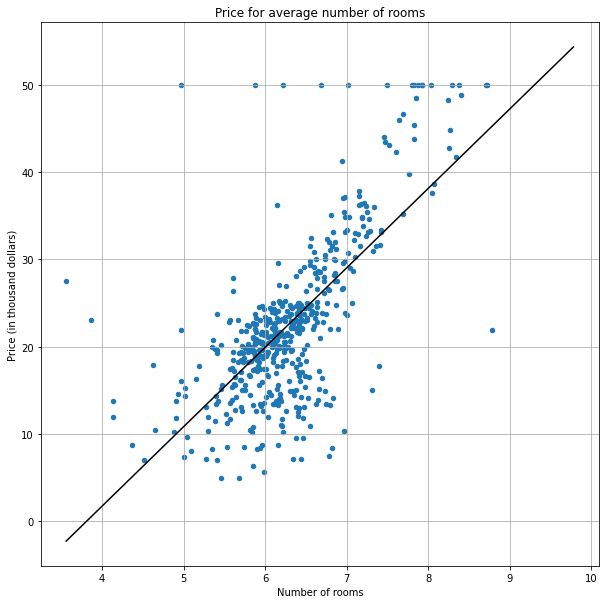

In [ ]:
# TODO
# Points on the regression line
xp = np.linspace(min(x), max(x)+1,20)
yp = w*xp + b

plt.figure(1,figsize=(10,10))
plt.ylabel('Price (in thousand dollars)')
plt.xlabel('Number of rooms')
plt.title('Price for average number of rooms')
plt.scatter(x,y,s=20)
plt.grid()
plt.plot(xp,yp,'black')

### **Linear regression with multiple features/attributes [3 points]**
One possible way to try to improve the fit is to use multiple variables at the same time.

In this problem, the target variable will still be the `PRICE`.  We will use multiple attributes of the house to predict the price.  

The names of all the data attributes are given in variable `names`. 
* We can get the list of names of the columns from `df.columns.tolist()`.  
* Remove the last items from the list using indexing.

In [ ]:
xnames = names[:-1]
print(names[:-1])

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


Let us use `CRIM`, `RM`, and `LSTAT` to predict `PRICE`. 

Get the data matrix `X` with three features (`CRIM`, `RM`, `LSTAT`) and target vector `y` from the dataframe `df`.  

Recall that to get the items from a dataframe, you can use syntax such as

    s = np.array(df['RM'])  
        
which gets the data in the column `RM` and puts it into an array `s`.  You can also get multiple columns with syntax like

    X12 = np.array(df[['CRIM', 'ZN']])  


In [ ]:
# TODO
# X = ...
X = np.array(df[['CRIM', 'RM', 'LSTAT']])
print (X.shape)
X[:10] 

(506, 3)


array([[6.3200e-03, 6.5750e+00, 4.9800e+00],
       [2.7310e-02, 6.4210e+00, 9.1400e+00],
       [2.7290e-02, 7.1850e+00, 4.0300e+00],
       [3.2370e-02, 6.9980e+00, 2.9400e+00],
       [6.9050e-02, 7.1470e+00, 5.3300e+00],
       [2.9850e-02, 6.4300e+00, 5.2100e+00],
       [8.8290e-02, 6.0120e+00, 1.2430e+01],
       [1.4455e-01, 6.1720e+00, 1.9150e+01],
       [2.1124e-01, 5.6310e+00, 2.9930e+01],
       [1.7004e-01, 6.0040e+00, 1.7100e+01]])

**Linear regression in scikit-learn**

To fit the linear model, we could create a regression object and then fit the training data with regression object.

```python
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
```

You can see the coefficients as
```python
regr.intercept_
regr.coef_
```

We can predict output for any data as 
```python
y_pred = regr.predict(X)
```
**Instead of taking this approach, we will implement the regression function directly.**

**Split the Data into Training and Test**

Split the data into training and test.  Use 30% for test and 70% for training.  You can do the splitting manually or use the `sklearn` package `train_test_split`.   Store the training data in `Xtr,ytr` and test data in `Xts,yts`.


In [ ]:
# TODO
Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=0.3)

print(Xtr.shape, Xts.shape)
print(ytr.shape, yts.shape)

(354, 3) (152, 3)
(354,) (152,)


Compute the predicted values `yhat_tr` on the training data and print the average square loss value on the **training** data.

In [ ]:
# TODO 
regr = linear_model.LinearRegression()
regr.fit(Xtr,ytr)
yhat_tr = regr.predict(Xtr)
loss = np.sum((yhat_tr - ytr)**2)/len(ytr)
loss

32.44832518659025

Create a scatter plot of the actual vs. predicted values of `y` on the **training** data.

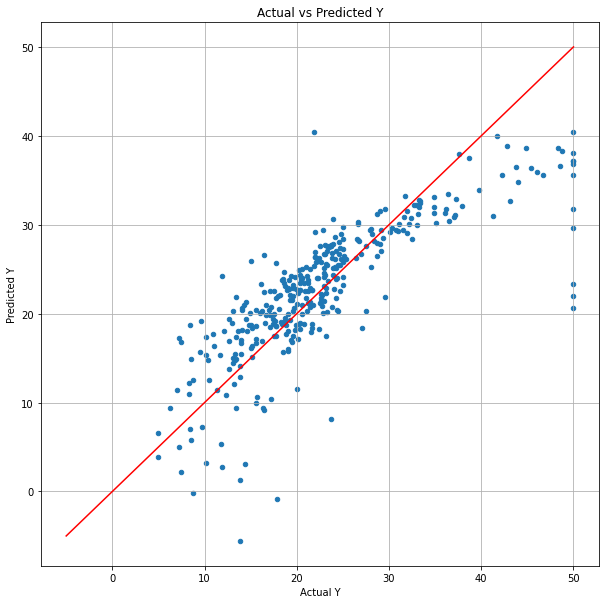

In [ ]:
# TODO
x_line = np.linspace(-5,50,100)
y_line = x_line


plt.figure(1,figsize=(10,10))
plt.ylabel('Predicted Y')
plt.xlabel('Actual Y')
plt.title('Actual vs Predicted Y')
plt.scatter(ytr,yhat_tr,s=20)
plt.grid()
plt.plot(x_line,y_line,'r',label='x=y line')

Compute the predicted values `yhat_ts` on the test data and print the average square loss value on the **test** data.

In [ ]:
# TODO 
regr = linear_model.LinearRegression()
regr.fit(Xts,yts)
yhat_ts = regr.predict(Xts)
loss = np.sum((yhat_ts - yts)**2)/len(yts)
loss

23.655038348910892

Create a scatter plot of the actual vs. predicted values of `y` on the **test** data.

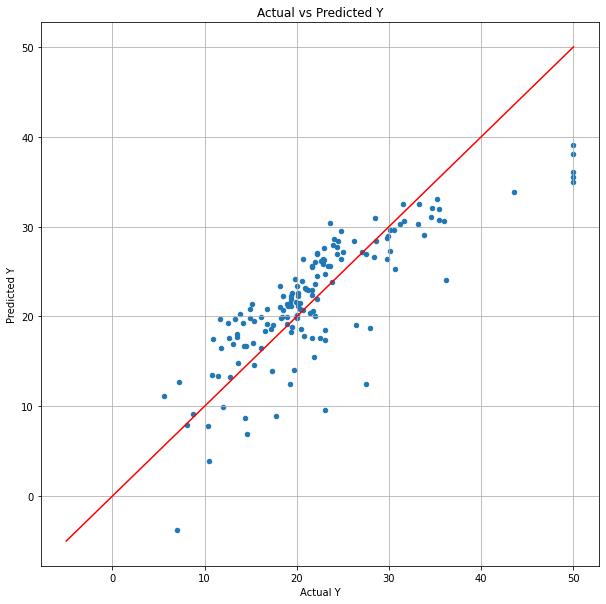

In [ ]:
# TODO
x_line = np.linspace(-5,50,100)
y_line = x_line


plt.figure(1,figsize=(10,10))
plt.ylabel('Predicted Y')
plt.xlabel('Actual Y')
plt.title('Actual vs Predicted Y')
plt.scatter(yts,yhat_ts,s=20)
plt.grid()
plt.plot(x_line,y_line,'r',label='x=y line')

### **Gradient descent for linear regression [2 points]**
Finally, we will implement the gradient descent version of linear regression.



In particular, the function implemented should follow the following format:
```python
def linear_regression_gd(X,y,learning_rate = 0.00001,max_iter=10000,tol=pow(10,-5)):
```
where `X` is the same data matrix used above (with ones column appended), `y` is the variable to be predicted, `learning_rate` is the learning rate used ($\alpha$ or $\rho_t$ in the slides), `max_iter` defines the maximum number of iterations that gradient descent is allowed to run, and `tol` is defining the tolerance for convergence (which we'll discuss next).

The return values for the above function should be (at the least) 1) `w` which are the regression parameters, 2) `all_cost` which is an array where each position contains the value of the objective function $L(\mathbf{w})$ for a given iteration, 3) `iters` which counts how many iterations did the algorithm need in order to converge to a solution.

Gradient descent is an iterative algorithm; it keeps updating the variables until a convergence criterion is met. In our case, our convergence criterion is whichever of the following two criteria happens first:

- The maximum number of iterations is met
- The relative improvement in the cost is not greater than the tolerance we have specified. For this criterion, you may use the following snippet into your code:
```python
np.absolute(all_cost[it] - all_cost[it-1])/all_cost[it-1] <= tol
```

In [ ]:
# TODO 
# Implement gradient descent for linear regression 

def compute_cost(X,w,y):
    L = (np.linalg.norm(y-(X@w),2))**2
    return L

def compute_gradient(X,w,y):
    L = np.matmul(X.T,(np.matmul(X, w) - y))
    return L

def linear_regression_gd(X,y,learning_rate = 0.00001,max_iter=10000,tol=pow(10,-5)):
    
    iters = 0
    all_cost = []
    w = np.zeros(X[0].shape[0])
    
    for epoch in range(max_iter):
        
        grad = compute_gradient(X,w,y)
        cost = compute_cost(X,w,y)
        all_cost.append(cost)
        w = w - learning_rate*grad
        
        iters += 1
    
        check_err = np.absolute((all_cost[epoch] - all_cost[epoch-1])/all_cost[epoch-1])
        if epoch > 1 and check_err <= tol:
            print ('break by tolerence', check_err)
            print ('iter', iters)
            break
    
    
    return w, all_cost, iters

### **Convergence plots [2 points]**
After implementing gradient descent for linear regression, we would like to test that indeed our algorithm converges to a solution. In order see this, we are going to look at the value of the objective/loss function $L(\mathbf{w})$ as a function of the number of iterations, and ideally, what we would like to see is $L(\mathbf{w})$ drops as we run more iterations, and eventually it stabilizes. 

The learning rate plays a big role in how fast our algorithm converges: a larger learning rate means that the algorithm is making faster strides to the solution, whereas a smaller learning rate implies slower steps. In this question we are going to test two different values for the learning rate:
- 0.00001
- 0.000001

while keeping the default values for the max number of iterations and the tolerance.


- Plot the two convergence plots (cost(loss) vs. iterations)

- What do you observe?



break by tolerence 9.638602038760893e-07
iter 175


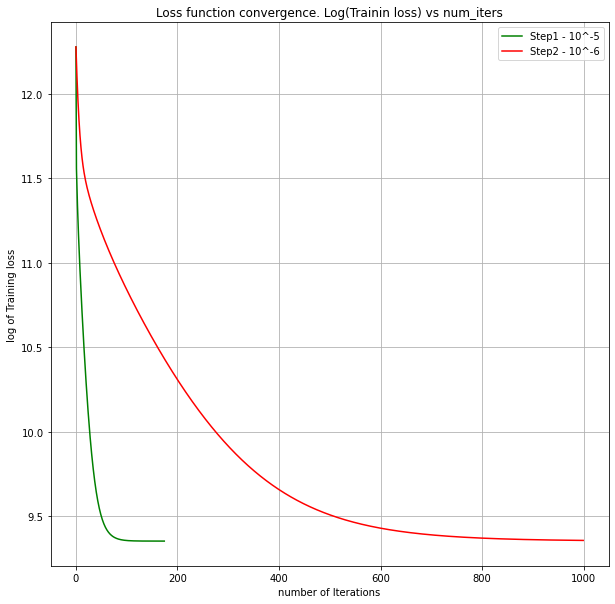

In [ ]:
# TODO 
# test gradient descent with step size 0.00001
# test gradient descent with step size 0.000001
fig = plt.figure(0, figsize=(10,10))

(w1, all_cost1,iters1) = linear_regression_gd(Xtr,ytr,learning_rate = 0.00001,max_iter = 1000, tol=pow(10,-6))  
green, = plt.plot([i for i in range(iters1)], [np.log(i) for i in all_cost1[0:iters1]], 'green')
  

(w2, all_cost2,iters2) = linear_regression_gd(Xtr,ytr,learning_rate = 0.000001,max_iter = 1000, tol=pow(10,-6))  
red, = plt.plot([i for i in range(iters2)],[np.log(i) for i in all_cost2[0:iters2]],'red')

plt.legend([green, red], ['Step1 - 10^-5', 'Step2 - 10^-6'])
plt.xlabel('number of Iterations')
plt.ylabel('log of Training loss')
plt.title('Loss function convergence. Log(Trainin loss) vs num_iters')
plt.grid()
plt.show()

Observations: 

1. The Gradient Descent(GD) with lower step size, red in this case, takes more iterations to come to same result than GD with larger step size, Green in this case.
2. Red has still not converged and is limited by number of iterations whilst green is limited by our tolerance value.

# **Question 2. Logistic Regression [8 points]**

In this question, we will plot the logistic function and perform logistic regression. We will use the breast cancer data set.  This data set is described here: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin.

Each sample is a collection of features that were manually recorded by a physician upon inspecting a sample of cells from fine needle aspiration.  The goal is to detect if the cells are benign or malignant.  

We could use the `sklearn` built-in `LogisticRegression` class to find the weights for the logistic regression problem.  The `fit` routine in that class has an *optimizer* to select the weights to best match the data.  To understand how that optimizer works, in this problem, we will build a very simple gradient descent optimizer from scratch.  

### Loading and visualizing the Breast Cancer Data

We load the data from the UCI site and remove the missing values.

In [ ]:
names = ['id','thick','size_unif','shape_unif','marg','cell_size','bare',
         'chrom','normal','mit','class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/' +
                 'breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                names=names,na_values='?',header=None)
df = df.dropna()
df.head(6)

,id,thick,size_unif,shape_unif,marg,cell_size,bare,chrom,normal,mit,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4


After loading the data, we can create a scatter plot of the data labeling the class values with different colors.  We will pick two of the features.  

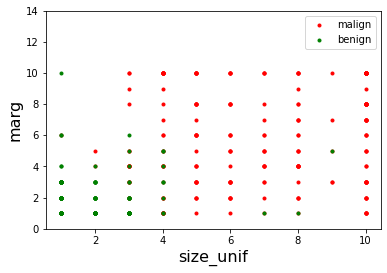

In [ ]:
# Get the response.  Convert to a zero-one indicator 
yraw = np.array(df['class'])
BEN_VAL = 2   # value in the 'class' label for benign samples
MAL_VAL = 4   # value in the 'class' label for malignant samples
y = (yraw == MAL_VAL).astype(int)
Iben = (y==0)
Imal = (y==1)

# Get two predictors
xnames =['size_unif','marg'] 
X = np.array(df[xnames])

# Create the scatter plot
plt.plot(X[Imal,0],X[Imal,1],'r.')
plt.plot(X[Iben,0],X[Iben,1],'g.')
plt.xlabel(xnames[0], fontsize=16)
plt.ylabel(xnames[1], fontsize=16)
plt.ylim(0,14)
plt.legend(['malign','benign'],loc='upper right')

The above plot is not informative, since many of the points are on top of one another.  Thus, we cannot see the relative frequency of points.  

We see that $\sigma(wx+b)$ represents the probability that $y=1$.  The function $\sigma(wx) > 0.5$ for $x>0$ meaning the samples are more likely to be $y=1$.  Similarly, for $x<0$, the samples are more likely to be $y=0$.  The scaling $w$ determines how fast that transition is and $b$ influences the transition point.  

### **Fitting the Logistic Model on Two  Variables**

We will fit the logistic model on the two variables `size_unif` and `marg`.

In [ ]:
# load data 
xnames =['size_unif','marg'] 
X = np.array(df[xnames])
print(X.shape)

(683, 2)


Next we split the data into training and test. Use 30% for test and 70% for training.  You can do the splitting manually or use the `sklearn` package `train_test_split`.   Store the training data in `Xtr,ytr` and test data in `Xts,yts`.

In [ ]:
# TODO
from sklearn.model_selection import train_test_split
Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=0.30)

**Logistic regression in scikit-learn**

The actual fitting is easy with the `sklearn` package.  The parameter `C` 
states the level of inverse regularization strength with higher values meaning less regularization. Right now, we will select a high value to minimally regularize the estimate.

We can also measure the accuracy on the test data. You should get an accuracy around 90%. 

In [ ]:
from sklearn import datasets, linear_model, preprocessing
reg = linear_model.LogisticRegression(C=1e5)
reg.fit(Xtr, ytr)

print(reg.coef_)
print(reg.intercept_)

yhat = reg.predict(Xts)
acc = np.mean(yhat == yts)
print("Accuracy on test data = %f" % acc)

[[1.34726285 0.35664997]]
[-5.40716062]
Accuracy on test data = 0.960976


**Instead of taking this approach, we will implement the regression function using gradient descent.**

### **Gradient descent for logistic regression [4 points]**
The weight vector can be found by minimizing the negative log likelihood over $N$ training samples.  The negative log likelihood is called the *loss* function.  For the logistic regression problem, the loss function simplifies to

$$L(\mathbf{w}) = - \sum_{i=1}^N y_i \log \sigma(\mathbf{w}^T\mathbf{x}_i+b) + (1-y_i)\log [1-\sigma(\mathbf{w}^T\mathbf{x}_i+b)].$$

Gradient can be computed as $$\nabla_\mathbf{w}L = \sum_{i=1}^N(\sigma(\mathbf{w}^T\mathbf{x}_i)-y_i)\mathbf{x}_i ,~~~ \nabla_b L = \sum_{i=1}^N(\sigma(\mathbf{w}^T\mathbf{x}_i)-y_i).$$


We can update $\mathbf{w},b$ at every iteration as  
$$ \mathbf{w} \gets \mathbf{w} - \alpha \nabla_\mathbf{w}L, \\ b \gets b - \alpha \nabla_b L.$$ 

**Note that we could also append the constant term in $\mathbf{w}$ and append 1 to every $\mathbf{x}_i$ accordingly, but we kept them separate in the expressions above.**

 

**Gradient descent function implementation** 

We will use this loss function and gradient to implement a gradient descent-based method for logistic regression.

Recall that training a logistic function means finding a weight vector `w` for the classification rule:
$$P(y=1|x,w) = \frac{1}{1+e^{-z}}, z = w[0]+w[1]\cdot x[1] + \cdots + w[d]\cdot x[d]$$
    
    
The function implemented should follow the following format:
```python
def logistic_regression_gd(X,y,learning_rate = 0.001,max_iter=1000,tol=pow(10,-5)):
```
Where `X` is the training data feature(s), `y` is the variable to be predicted, `learning_rate` is the learning rate used ($\alpha$ in the slides), `max_iter` defines the maximum number of iterations that gradient descent is allowed to run, and `tol` is defining the tolerance for convergence (which we'll discuss next).

The return values for the above function should be (at the least):

1. `w` which are the regression parameters, 

2. `all_cost` which is an array where each position contains the value of the objective function $L(\mathbf{w})$ for a given iteration, 

3. `iters` which counts how many iterations did the algorithm need in order to converge to a solution.

Gradient descent is an iterative algorithm; it keeps updating the variables until a convergence criterion is met. In our case, our convergence criterion is whichever of the following two criteria happens first:

- The maximum number of iterations is met
- The relative improvement in the cost is not greater than the tolerance we have specified. For this criterion, you may use the following snippet into your code:
```python
np.absolute(all_cost[it] - all_cost[it-1])/all_cost[it-1] <= tol
```

In [ ]:
# TODO 
# Your code for logistic regression via gradient descent goes here 
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def compute_cost(X,w,b,y):

    L = 0
    for xi,yi in zip(X,y):
        hyp = w.T@xi + b
        one_pred = sigmoid(hyp)
        one_log = np.log(one_pred)
        
        zero_pred = 1 - sigmoid(hyp)
        zero_log = np.log(zero_pred)
        l = (yi*one_log) + ((1-yi)*zero_log)
        L += l

    return -L

def logistic_regression_gd(X,y,learning_rate = 0.00001,max_iter=1000,tol=pow(10,-5)):

    w = np.zeros(X[0].shape[0])
    b = 0
    iters = 0
    all_cost = []
    cost = compute_cost(X,w,b,y)
    all_cost.append(cost)

    for epoch in range(max_iter):

        w_now = np.zeros(X[0].shape[0])
        b_now = 0

        for xi,yi in zip(X,y):
            hyp = w.T@xi + b
            pred = sigmoid(hyp)
            err = pred - yi
            w_now += err*xi
            b_now += err
        
        w -= learning_rate*w_now
        b -= learning_rate*b_now

        iters += 1
        cost = compute_cost(X,w,b,y)
        all_cost.append(cost)

        if epoch > 1 and np.absolute(all_cost[epoch] - all_cost[epoch-1])/all_cost[epoch-1] <= tol:
            print ('break by tolerance', iters)
            break

    return w, b, all_cost, iters

### **Convergence plots and test accuracy [4 points]**

After implementing gradient descent for logistic regression, we would like to test that indeed our algorithm converges to a solution. In order see this, we are going to look at the value of the objective/loss function $L(\mathbf{w})$ as a function of the number of iterations, and ideally, what we would like to see is $L(\mathbf{w})$ drops as we run more iterations, and eventually it stabilizes. 

The learning rate plays a big role in how fast our algorithm converges: a larger learning rate means that the algorithm is making faster strides to the solution, whereas a smaller learning rate implies slower steps. In this question we are going to test two different values for the learning rate:
- 0.001
- 0.00001

while keeping the default values for the max number of iterations and the tolerance.


- Plot the two convergence plots (cost vs. iterations)
- Calculate the accuracy of classifier on the test data `Xts` 
- What do you observe? 


**Calculate accuracy of your classifier on test data**

To calculate the accuracy of our classifier on the test data, we can create a predict method. 

Implement a function `predict(X,w)` that provides you label 1 if $\mathbf{w}^T\mathbf{x} + b > 0$ and 0 otherwise.  

In [ ]:
# TODO 
# Predict on test samples and measure accuracy
def predict(X,w, b):
    preds = []
    for xi in X:
        grad = w.T@xi+b
        preds.append(grad)

    yhat = [1 if y > 0 else 0 for y in preds]
    return yhat

break by tolerance 816
Test accuracy1 = 0.960976
Test accuracy2 = 0.941463


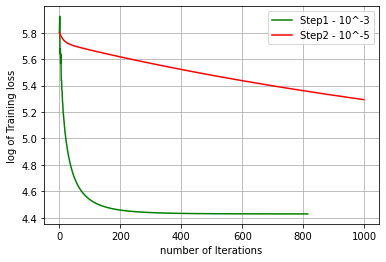

In [ ]:
# TODO 
# test gradient descent with step size 0.001
# test gradient descent with step size 0.00001
 
(w1, b1,all_cost1,iters1) = logistic_regression_gd(Xtr,ytr,learning_rate = 0.001,max_iter = 1000, tol=pow(10,-6))  
green, = plt.plot([i for i in range(iters1)], [np.log(i) for i in all_cost1[0:iters1]], 'green')
yhat1 = predict(Xts,w1,b1)
acc1 = np.mean(yhat1 == yts)
print("Test accuracy1 = %f" % acc1)

(w2, b2, all_cost2, iters2) = logistic_regression_gd(Xtr,ytr,learning_rate = 0.00001,max_iter = 1000, tol=pow(10,-6))  
red, = plt.plot([i for i in range(iters2)],[np.log(i) for i in all_cost2[0:iters2]],'red')
yhat2 = predict(Xts,w2,b2)
acc2 = np.mean(yhat2 == yts)
print("Test accuracy2 = %f" % acc2)

plt.legend([green, red], ['Step1 - 10^-3', 'Step2 - 10^-5'])
plt.xlabel('number of Iterations')
plt.ylabel('log of Training loss')
plt.grid()
plt.show()

Observations: 

1. The implementation with lower step size (red), has not yet converged while the green seems to have converged and reached the defined tolerence.
2. As red has not converged, it will have lower accuracy than green.